## Exploratory Data Analysis (EDA) 📊
Validamos que nuestros datos sintéticos tengan sentido matemático y de negocio.


In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path

# Configurar estilo
sns.set_theme(style="whitegrid")

# Cargar datos (Usando path relativo al notebook)
# Nota: ".." sube un nivel hacia la raíz
df = pd.read_csv("../data/raw/simulated_rent_data.csv")
df.head()


,address,comuna,surface_m2,distance_to_metro,price_uf
0,"Calle Pedro de Valdivia 3767, Santiago",Santiago,49,1091,20.30
1,"Calle Las Mandarinas 749, Las Condes",Las Condes,20,503,22.28
2,"Gloria Espinoza 9, Estación Central",Estación Central,55,206,23.06
3,"Los Piñones 31, Ñuñoa",Ñuñoa,35,177,27.13
4,"Avda. Pablo Díaz 578, Estación Central",Estación Central,96,443,26.38


## 1. Distribución del Target (Precio en UF)
Deberíamos ver una distribución algo asimétrica positiva (log-normalish) pero suavizada.

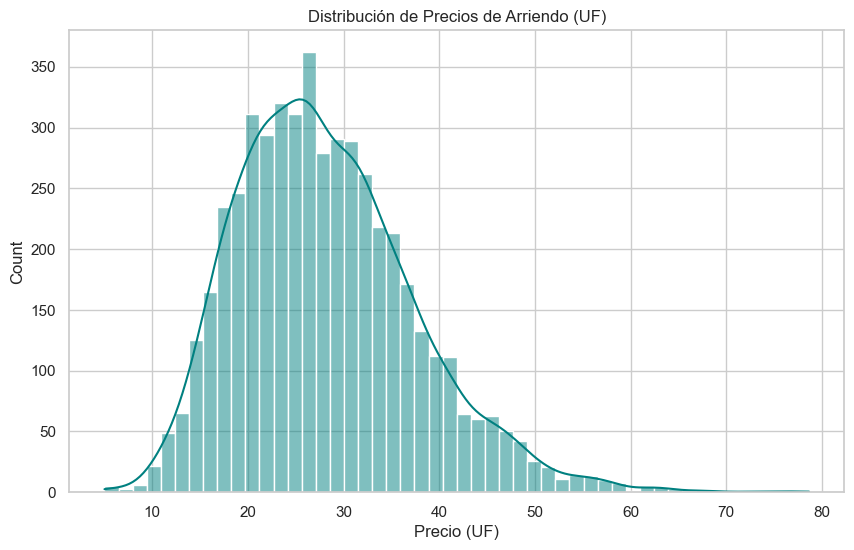

In [4]:
plt.figure(figsize=(10, 6))
sns.histplot(df['price_uf'], kde=True, bins=50, color='teal')
plt.title('Distribución de Precios de Arriendo (UF)')
plt.xlabel('Precio (UF)')
plt.show()


## 2. Correlaciones Clave
Aquí verificamos la "Lógica de Negocio" que programamos:
 * A más **m2**, mayor precio.
* A mayor **distancia al metro**, menor precio.

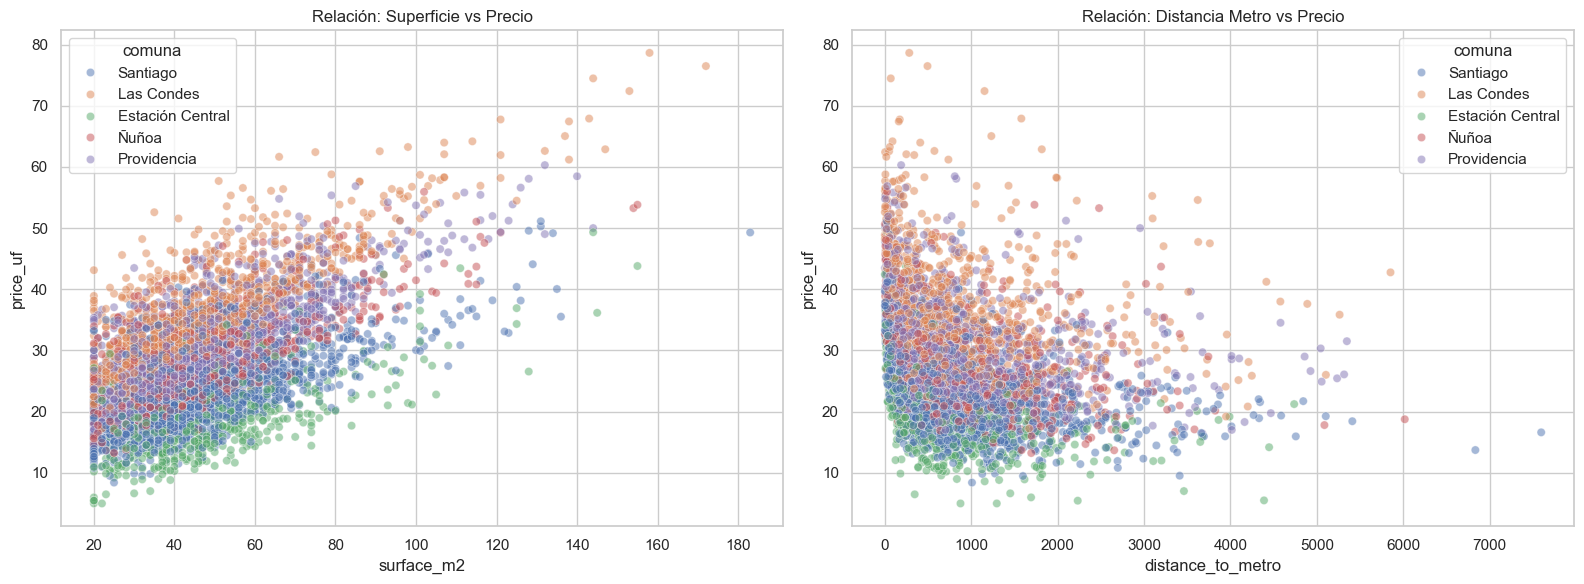

In [5]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: M2 vs Precio
sns.scatterplot(data=df, x='surface_m2', y='price_uf', hue='comuna', alpha=0.5, ax=axes[0])
axes[0].set_title('Relación: Superficie vs Precio')

# Plot 2: Distancia Metro vs Precio
sns.scatterplot(data=df, x='distance_to_metro', y='price_uf', hue='comuna', alpha=0.5, ax=axes[1])
axes[1].set_title('Relación: Distancia Metro vs Precio')

plt.tight_layout()
plt.show()


## 3. Boxplot por Comuna
Las Condes debería ser visiblemente más caro que Estación Central.

C:\Users\Diego\AppData\Local\Temp\ipykernel_20816\3030095709.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='comuna', y='price_uf', order=order, palette='viridis')


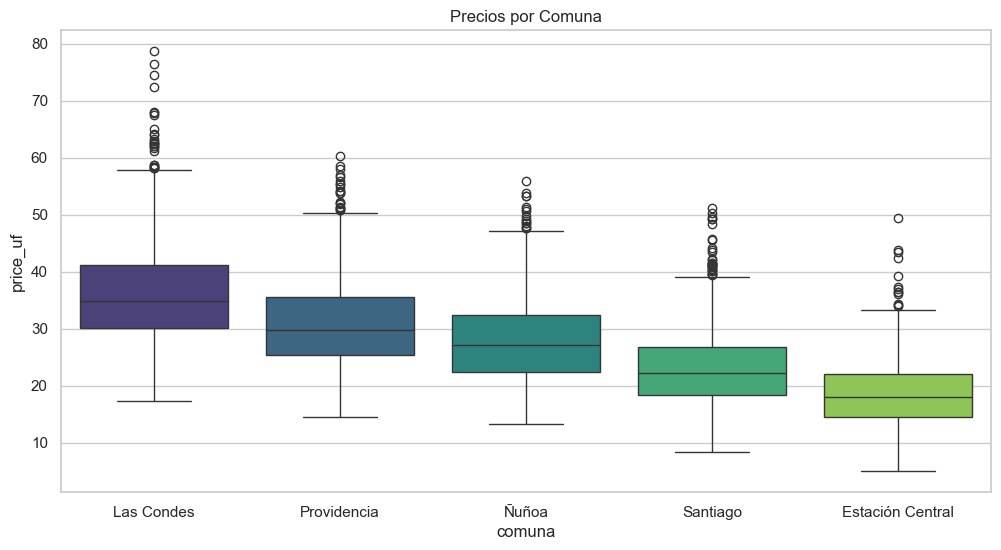

In [6]:
plt.figure(figsize=(12, 6))
# Ordenamos por mediana de precio
order = df.groupby('comuna')['price_uf'].median().sort_values(ascending=False).index
sns.boxplot(data=df, x='comuna', y='price_uf', order=order, palette='viridis')
plt.title('Precios por Comuna')
plt.show()